### Preliminary exploration and grouping of the data


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Generate three new tables to join with the original table in BI.Make three groups

In [ ]:
import pandas as pd

# Knowing that each ID has two rows of records. Then sort data by features of ID.
# Group AUM have ID with balance of AUM that is not equal to zero at least one time
# Group AUA have ID with balance of AUA that is not equal to zero at least one time
# Group depostis are the rest of users.


def selected_data(sorted_df):
    ids_with_non_zero_aum = sorted_df[sorted_df['AUM'] != 0]['ID'].unique()
    # ids_with_non_zero_aua = sorted_df[sorted_df['AUA'] != 0]['ID'].unique()
    # target_ids = sorted_df.groupby('ID').filter(lambda x: (x['AUM'] == 0).all() and (x['AUA'] == 0).all())['ID'].unique()
    selected_rows = sorted_df[sorted_df['ID'].isin(ids_with_non_zero_aum)]
    selected_rows.to_csv('AUM_based.csv', index=False)

    # selected_rows = sorted_df[sorted_df['ID'].isin(ids_with_non_zero_aua)]
    # selected_rows.to_csv('AUA_based.csv', index=False)

    # selected_rows = sorted_df[sorted_df['ID'].isin(target_ids)]
    # selected_rows.to_csv('not_AUM_or_AUA.csv', index=False)


def main():
    df = pd.read_csv('use_case.csv')
    sorted_df = df.sort_values(by=['ID', 'Date'])
    selected_data(sorted_df)


if __name__ == '__main__':
    main()

In [5]:
df = pd.read_csv(r'D:\bank\Use Case.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1050 non-null   object 
 1   ID        1050 non-null   int64  
 2   AUM       1050 non-null   int64  
 3   AUA       1050 non-null   int64  
 4   Deposits  1050 non-null   float64
 5   NPS       1050 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 49.3+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

C:\Users\lifen\AppData\Local\Temp\ipykernel_52016\625768749.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


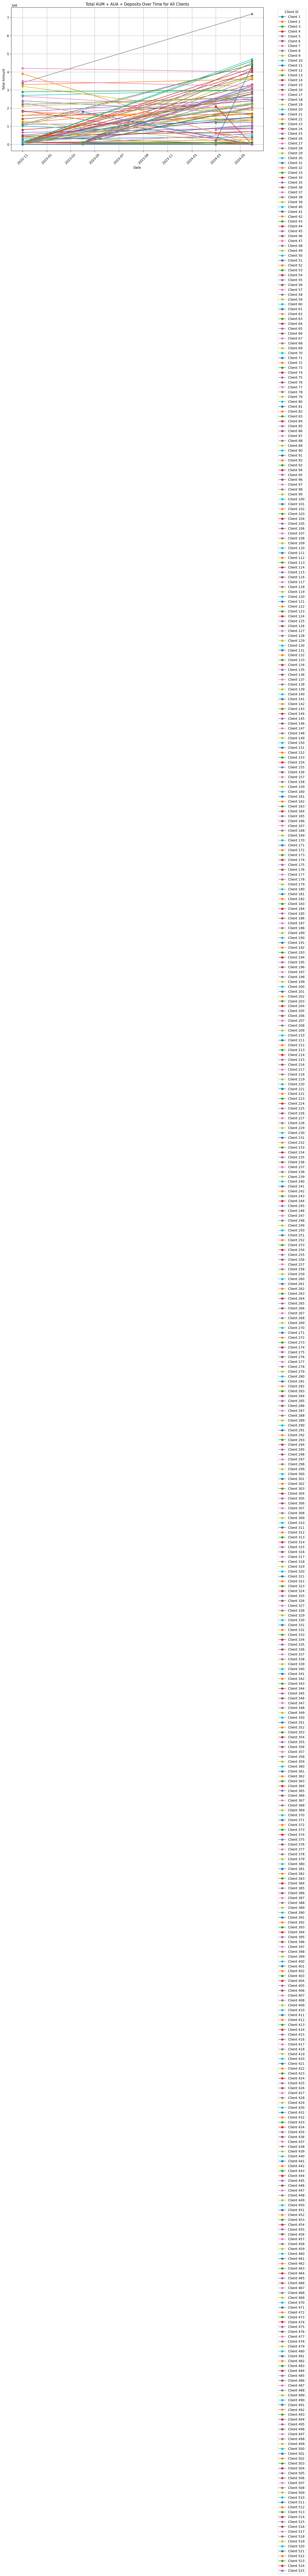

: 

In [17]:
df_grouped = df.groupby(['ID', 'Date'])['Total'].sum().reset_index()


plt.figure(figsize=(14, 8))

unique_ids = df_grouped['ID'].unique()

for client_id in unique_ids:
    client_data = df_grouped[df_grouped['ID'] == client_id]
    plt.plot(client_data['Date'], client_data['Total'], marker='o', label=f'Client {client_id}')

plt.title('Total AUM + AUA + Deposits Over Time for All Clients')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Client ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()